In [1]:
import numpy as np
import matplotlib.pyplot as plt

In K-means algorithm we aim to minimize the below **objective function** with respect to r and μ, where r are the coefficients which indicate the cluster that each datapoint belongs to, x are the datapoints and μ are the cluster centers :

![image.png](attachment:image.PNG)

The algorithm is based on the following two update steps which iterate  until convergence (ie. centers do not change "much") is achieved. 

Formula (9.2) determines the "clusters update step" by assigning each point to the cluster with the closest center. 

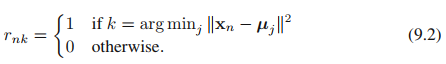

Formula (9.4) determines the "centers update step" by computing the mean of all points in the cluster.

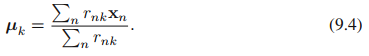

In [2]:
def kmeans(X,K):
    
    '''
    inputs : X = 2-dim array dataset
             K = the number of clusters
    outputs : c_new = are the final cluster centers
              labels = labels of the datapoints 
              fig = figure showing the dataset, the locations of the initially randomly chosen cluster centers and 
                    the locations of the final cluster centers determinded by the algorithm
    '''
    r = np.zeros(shape = (X[:,0].size, K))
    c_old = np.zeros((K,2))
    
    # choose random cluster centers
    xmax = max(abs(X[:,0]))
    ymax = max(abs(X[:,1]))
    l = max(xmax, ymax)

    side_length = l+1
    cx = np.random.random(K)*side_length
    cy = np.random.random(K)*side_length

    cx = np.reshape(cx, (cx.size,1))
    cy = np.reshape(cy, (cy.size,1))
    c_random = np.concatenate((cx,cy), axis = 1)
    c_new = np.concatenate((cx,cy), axis = 1)
    #print('initial randomly chosen centers : ', c_new)
    
    while np.linalg.norm(c_new - c_old) > 0.0001 :
    
        c_old = c_new

        # update clusters - formula (9.2)
        for i in range(X.shape[0]) :
            ar = np.array([])
            for k in range(K) :
                ar = np.append(ar,np.linalg.norm(X[i]-c_new[k]))
            j = np.argmin(ar)
            r[i][j] = 1

        # update centers - formula (9.4)
        for i in range(K) :
            if np.sum(r[:,i]) == 0 :
                continue
            else :
                v = np.reshape(r[:,i], (r[:,i].size,1))
                c_new[i] = sum(v*X) / np.sum(r[:,i])
    
    labels = np.where(r==1)[1]
    labels = np.reshape(labels,(labels.size,1))
    
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], color = 'lightblue')
    ax.scatter(c_random[:,0], c_random[:,1], color = 'black', marker = '*', label='initial random cluster centers')
    ax.scatter(c_new[:,0], c_new[:,1], color = 'blue', marker = '*', label='final cluster centers')
    ax.legend(loc='best')
    plt.close()
        
    return c_new, labels, fig